# Mono scenario (Non guardare, skippa sotto)

In [ ]:
# ### Se vuoi usare NP

# # Define NASA TLX dimensions
# dimensions = ["Mental Demand", "Physical Demand", "Temporal Demand", "Performance", "Effort", "Frustration"]

# # Simulated NASA TLX scores for 12 users (Replace with actual data)
# n_users = 12
# n_tasks = 6

# # Generate random scores (Replace with actual data)
# np.random.seed(42)
# nasa_tlx_scores = {
#     f"Task {i+1}": np.random.randint(0, 101, size=(n_users, len(dimensions))) for i in range(n_tasks)
# }

# # Convert to DataFrame format suitable for Seaborn
# dfs = []
# for task, scores in nasa_tlx_scores.items():
#     df_task = pd.DataFrame(scores, columns=dimensions)
#     df_task["Task"] = task
#     dfs.append(df_task)

# df = pd.concat(dfs)
# df_melted = df.melt(id_vars=["Task"], var_name="Dimension", value_name="Score")

# # print(nasa_tlx_scores)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from collections import defaultdict
import pprint

In [ ]:
### Se vuoi usare una list int
# Define NASA TLX dimensions
dimensions = ["Mental Demand", "Physical Demand", "Temporal Demand", "Performance", "Effort", "Frustration"]

def get_hc_data():
    # Define user scores explicitly (Example values, replace with actual data)
    task1_scores = [
        [55, 30, 45, 80, 65, 50],  # User 1
        [60, 35, 50, 85, 70, 55],  # User 2
        [50, 25, 40, 75, 60, 45],  # User 3
        [65, 40, 55, 90, 75, 60],  # User 4
        [70, 45, 60, 95, 80, 65],  # User 5
        [45, 20, 35, 70, 55, 40],  # User 6
        [55, 30, 45, 85, 65, 50],  # User 7
        [60, 35, 50, 80, 70, 55],  # User 8
        [50, 25, 40, 75, 60, 45],  # User 9
        [65, 40, 55, 90, 75, 60],  # User 10
        [70, 45, 60, 95, 80, 65],  # User 11
        [45, 20, 35, 70, 55, 40]   # User 12
    ]

    task2_scores = [
        [55, 30, 45, 80, 23, 50],  # User 1
        [60, 8, 50, 85, 70, 55],  # User 2
        [50, 25, 40, 75, 60, 45],  # User 3
        [44, 40, 55, 44, 75, 60],  # User 4
        [70, 45, 60, 95, 80, 65],  # User 5
        [45, 20, 35, 70, 55, 40],  # User 6
        [55, 30, 45, 85, 65, 50],  # User 7
        [60, 35, 22, 80, 70, 55],  # User 8
        [67, 25, 40, 75, 88, 45],  # User 9
        [65, 40, 55, 90, 75, 60],  # User 10
        [70, 45, 60, 95, 80, 65],  # User 11
        [45, 1, 35, 70, 55, 40]   # User 12
    ]

    # Repeat the same format for tasks 3, 4, 5, and 6...
    task3_scores = task1_scores  # Replace with actual data
    task4_scores = task2_scores  # Replace with actual data
    task5_scores = task1_scores  # Replace with actual data
    task6_scores = task2_scores  # Replace with actual data

    # Store task scores in a dictionary
    task_scores = {
        "Task 1": task1_scores,
        "Task 2": task2_scores,
        "Task 3": task3_scores,
        "Task 4": task4_scores,
        "Task 5": task5_scores,
        "Task 6": task6_scores
    }

    # print(nasa_tlx_scores)
    # Convert to a DataFrame format for plotting
    dfs = []
    for task, scores in task_scores.items():
        df_task = pd.DataFrame(scores, columns=dimensions)
        df_task["Task"] = task
        dfs.append(df_task)
    df = pd.concat(dfs)
    df_melted = df.melt(id_vars=["Task"], var_name="Dimension", value_name="Score")
    return df, df_melted


df1, df_melted1 = get_hc_data()
pprint.pprint(df_melted1)

       Task      Dimension  Score
0    Task 1  Mental Demand     55
1    Task 1  Mental Demand     60
2    Task 1  Mental Demand     50
3    Task 1  Mental Demand     65
4    Task 1  Mental Demand     70
..      ...            ...    ...
427  Task 6    Frustration     55
428  Task 6    Frustration     45
429  Task 6    Frustration     60
430  Task 6    Frustration     65
431  Task 6    Frustration     40

[432 rows x 3 columns]


In [ ]:
dimensions = ["Mental Demand", "Physical Demand", "Temporal Demand", "Performance", "Effort", "Frustration", "RawNASA"]

def read_csv_to_task_scores(csv_file):
    task_scores = defaultdict(list)

    with open(csv_file, newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)

        user_index = {}
        user_count = 0

        for row in reader:
            user_id = row['ID']
            task_id = f"Task {row['Task']}"

            scores = [
                float(row['MentalDemand'].replace(',', '.')),
                float(row['PhysicalDemand'].replace(',', '.')),
                float(row['TemporalDemand'].replace(',', '.')),
                float(row['Performance'].replace(',', '.')),
                float(row['Effort'].replace(',', '.')),
                float(row['Frustration'].replace(',', '.'))
            ]

            # Determine RawNASA: if the column exists and is not empty, use its value;
            # otherwise compute it as the mean of the above six dimensions.
            if 'RawNASA' in row and row['RawNASA'].strip() != '':
                raw_nasa = float(row['RawNASA'].replace(',', '.'))
            else:
                raw_nasa = sum(scores) / len(scores)
            # Append the RawNASA value to the list (so each score list contains 7 values)
            scores.append(raw_nasa)


            if user_id not in user_index:
                user_index[user_id] = user_count
                user_count += 1

            user_position = user_index[user_id]

            if len(task_scores[task_id]) <= user_position:
                task_scores[task_id].append([])

            task_scores[task_id][user_position] = scores

    return dict(task_scores)

def get_df_from_csv():
  # Example usage
  csv_file = "VR-NASA.csv"  # Replace with actual CSV file path
  task_scores = read_csv_to_task_scores(csv_file)

  # Convert to a DataFrame format for plotting
  dfs = []
  for task, scores in task_scores.items():
      df_task = pd.DataFrame(scores, columns=dimensions)
      df_task["Task"] = task
      dfs.append(df_task)

  df = pd.concat(dfs)
  df_melted = df.melt(id_vars=["Task"], var_name="Dimension", value_name="Score")
  return df, df_melted

df2, df_melted2 = get_df_from_csv()
pprint.pprint(df_melted2)
# Print the parsed DataFrame
# pprint.pprint(task_scores)

       Task      Dimension      Score
0    Task 1  Mental Demand   0.000000
1    Task 1  Mental Demand  45.000000
2    Task 1  Mental Demand  10.000000
3    Task 1  Mental Demand  55.000000
4    Task 1  Mental Demand  65.000000
..      ...            ...        ...
499  Task 6        RawNASA   8.333333
500  Task 6        RawNASA  30.000000
501  Task 6        RawNASA  10.000000
502  Task 6        RawNASA  10.000000
503  Task 6        RawNASA   9.166667

[504 rows x 3 columns]


In [ ]:
def plot_data(df, df_melted):
  # Set up the figure for 2 rows × 3 columns
  # fig, axes = plt.subplots(2, 3, figsize=(18, 12))
  fig, axes = plt.subplots(1, 6, figsize=(24, 6))
  axes = axes.flatten()

  # Create violin plots for each task
  for i, task in enumerate(df["Task"].unique()):
      print("TASK", task)
      ax = axes[i]
      sns.violinplot(x="Dimension", y="Score", data=df_melted[df_melted["Task"] == task], ax=ax, inner="quartile", palette="muted", hue="Dimension", legend=False)

      # Set title and labels
      ax.set_title(task, fontsize=14, fontweight="bold")
      ax.set_ylabel("Score (0-100)", fontsize=12)
      ax.set_xlabel("")
      ax.set_xticks(ticks=range(len(dimensions)), labels=dimensions, rotation=45)
      # ax.set_xticklabels(dimensions, rotation=30, fontsize=11)

      # Enhance visibility with a grid
      ax.yaxis.grid(True, linestyle="--", alpha=0.7)  # Dashed grid lines

  # Adjust layout
  plt.suptitle("NASA TLX Scores per Task", fontsize=16, fontweight="bold")
  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()


TASK Task 1
TASK Task 2
TASK Task 3
TASK Task 4
TASK Task 5
TASK Task 6


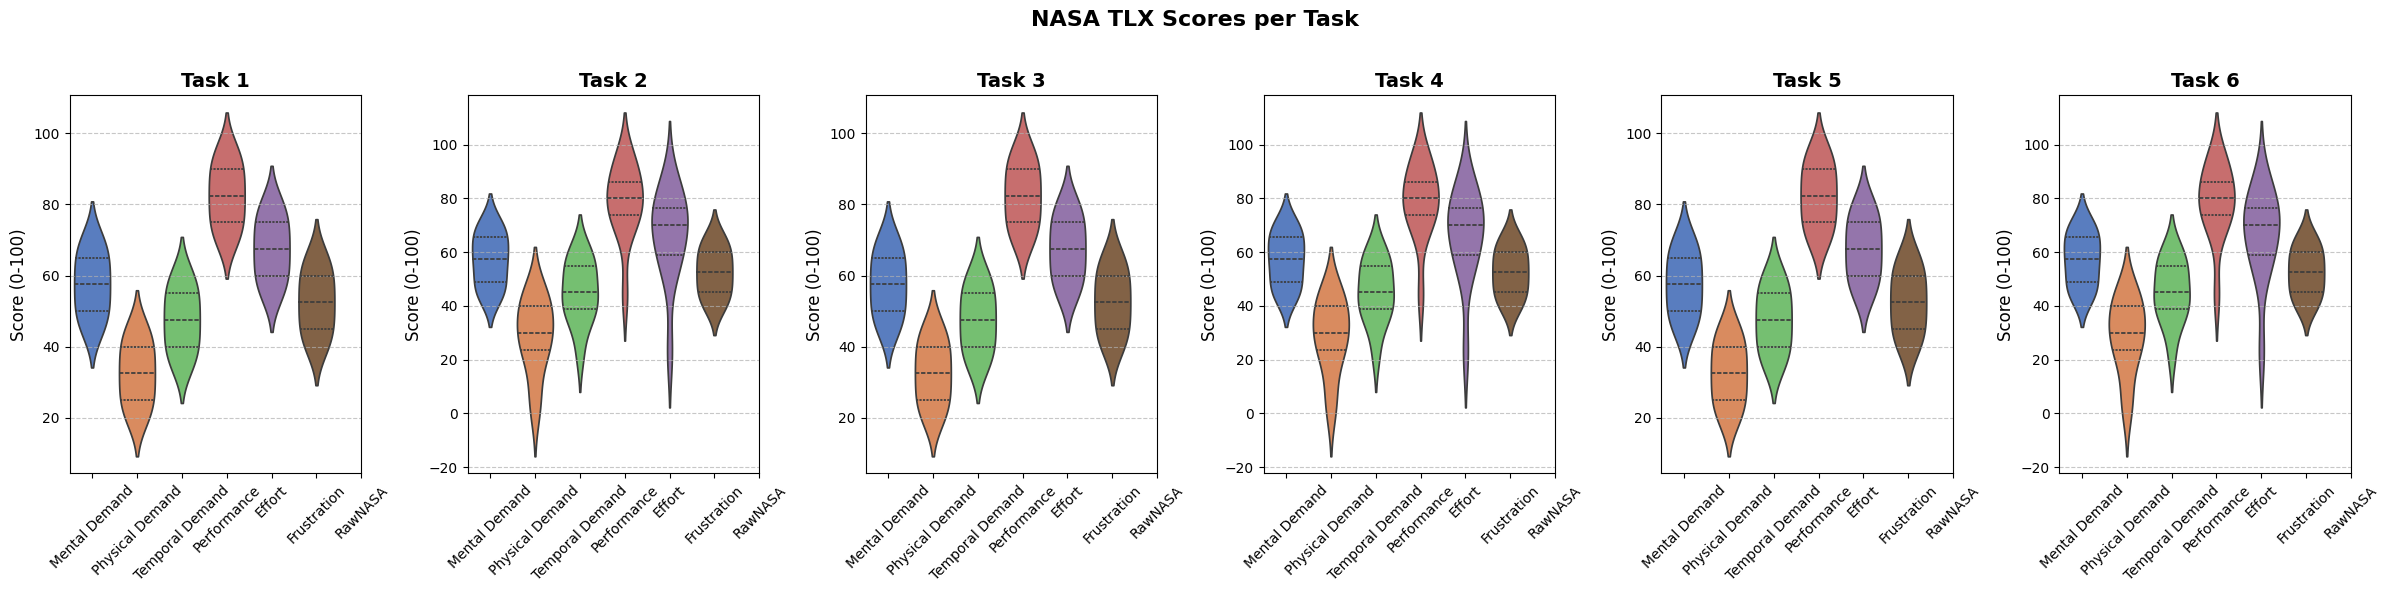

In [ ]:
plot_data(df1, df_melted1)

TASK Task 1
TASK Task 2
TASK Task 3
TASK Task 4
TASK Task 5
TASK Task 6


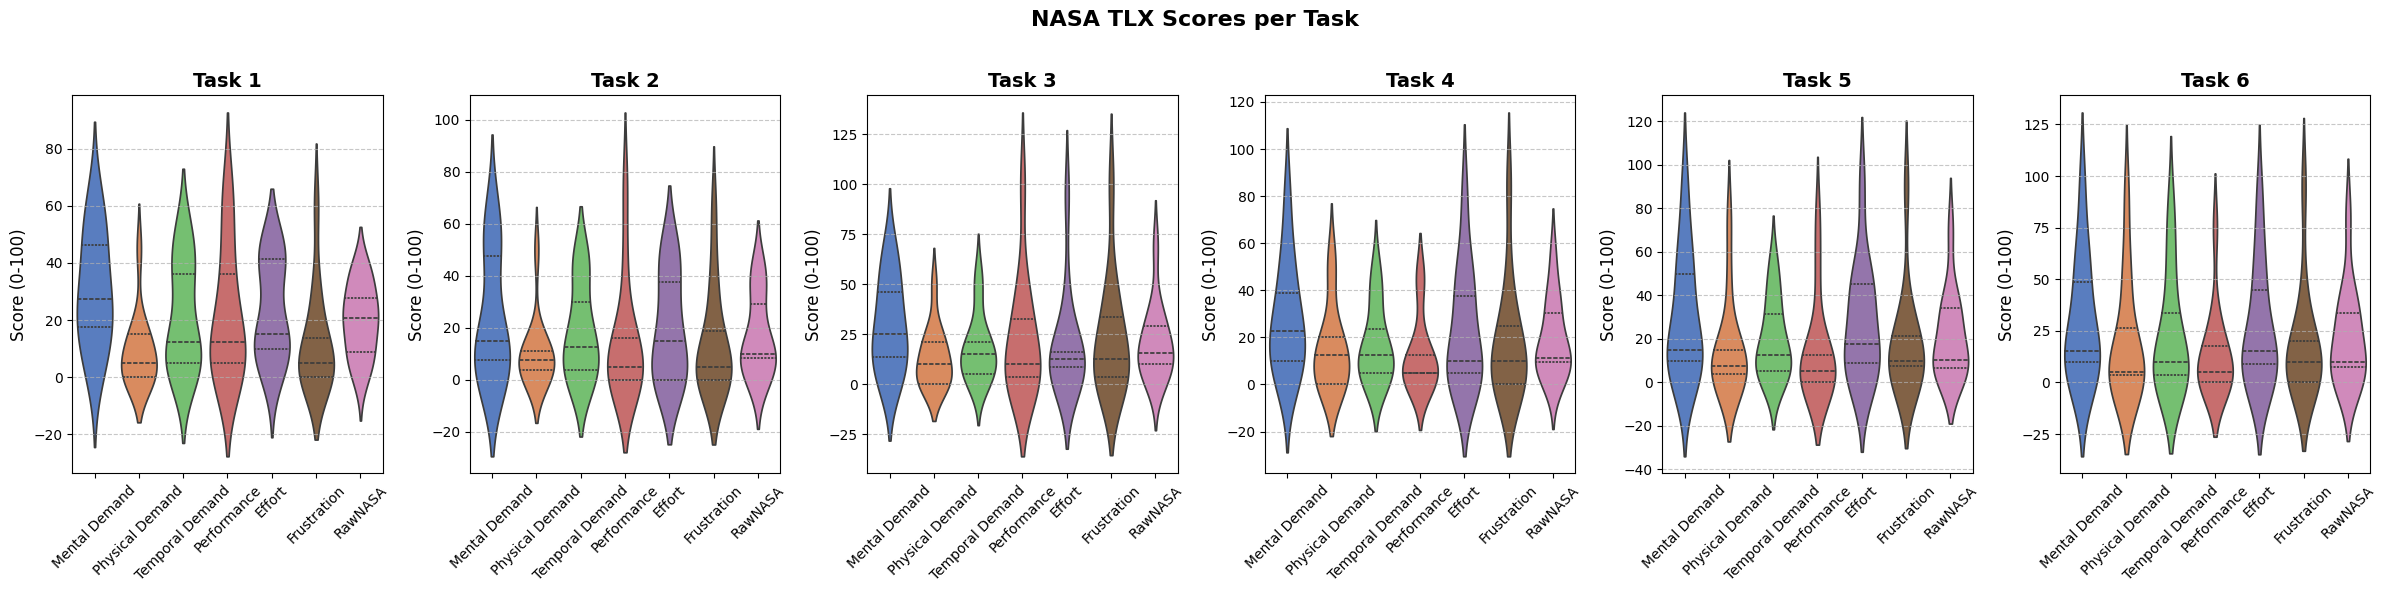

In [ ]:
plot_data(df2, df_melted2)

# Bi-scenario

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
import pprint

dimensions = ["MD", "PD", "TD", "Perf", "Eff", "Frus", "Raw"]


In [ ]:


# # Define NASA TLX dimensions

# # Example VR and AR scores (replace with actual collected data)
# task1_vr = [
#     [55, 30, 45, 80, 65, 50], [60, 35, 50, 85, 70, 55], [50, 25, 40, 75, 60, 45],
#     [65, 40, 55, 90, 75, 60], [70, 45, 60, 95, 80, 65], [45, 20, 35, 70, 55, 40],
#     [55, 30, 45, 85, 65, 50], [60, 35, 50, 80, 70, 55], [50, 25, 40, 75, 60, 45],
#     [65, 40, 55, 90, 75, 60], [70, 45, 60, 95, 80, 65], [45, 20, 35, 70, 55, 40]
# ]

# task1_ar = [
#     [50, 25, 40, 70, 60, 45], [55, 30, 45, 75, 65, 50], [45, 20, 35, 65, 55, 40],
#     [60, 35, 50, 80, 70, 55], [65, 40, 55, 85, 75, 60], [55, 30, 45, 75, 65, 50],
#     [50, 25, 40, 70, 60, 45], [55, 30, 45, 75, 65, 50], [45, 20, 35, 65, 55, 40],
#     [60, 35, 50, 80, 70, 55], [65, 40, 55, 85, 75, 60], [55, 30, 45, 75, 65, 50]
# ]

# # Repeat for tasks 2-6...
# task2_vr, task3_vr, task4_vr, task5_vr, task6_vr = task1_vr, task1_vr, task1_vr, task1_vr, task1_vr
# task2_ar, task3_ar, task4_ar, task5_ar, task6_ar = task1_ar, task1_ar, task1_ar, task1_ar, task1_ar

# # Store task scores in a dictionary
# task_scores = {
#     "Task 1": (task1_vr, task1_ar),
#     "Task 2": (task2_vr, task2_ar),
#     "Task 3": (task3_vr, task3_ar),
#     "Task 4": (task4_vr, task4_ar),
#     "Task 5": (task5_vr, task5_ar),
#     "Task 6": (task6_vr, task6_ar)
# }

# # Convert to a DataFrame format for plotting
# dfs = []
# for task, (vr_scores, ar_scores) in task_scores.items():
#     df_vr = pd.DataFrame(vr_scores, columns=dimensions)
#     df_vr["Task"] = task
#     df_vr["Scenario"] = "VR"

#     df_ar = pd.DataFrame(ar_scores, columns=dimensions)
#     df_ar["Task"] = task
#     df_ar["Scenario"] = "AR"

#     dfs.append(df_vr)
#     dfs.append(df_ar)

# df1 = pd.concat(dfs)
# df_melted1 = df1.melt(id_vars=["Task", "Scenario"], var_name="Dimension", value_name="Score")

In [ ]:
def read_csv_to_task_scores(csv_file):
    """Reads a CSV and structures task scores into a dictionary."""
    task_scores = defaultdict(list)
    user_index = {}
    user_count = 0

    with open(csv_file, newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)

        for row in reader:
            user_id = row['ID']
            task_id = f"Task {row['Task']}"

            # Convert scores to float (handling comma as decimal separator)
            scores = [
                float(row['MentalDemand'].replace(',', '.')),
                float(row['PhysicalDemand'].replace(',', '.')),
                float(row['TemporalDemand'].replace(',', '.')),
                float(row['Performance'].replace(',', '.')),
                float(row['Effort'].replace(',', '.')),
                float(row['Frustration'].replace(',', '.'))
            ]

            # Determine RawNASA: if the column exists and is not empty, use its value;
            # otherwise compute it as the mean of the above six dimensions.
            if 'RawNASA' in row and row['RawNASA'].strip() != '':
                raw_nasa = float(row['RawNASA'].replace(',', '.'))
            else:
                raw_nasa = sum(scores) / len(scores)
            # Append the RawNASA value to the list (so each score list contains 7 values)
            scores.append(raw_nasa)


            # Assign a unique index to each user
            if user_id not in user_index:
                user_index[user_id] = user_count
                user_count += 1

            user_position = user_index[user_id]

            # Ensure the list is long enough
            while len(task_scores[task_id]) <= user_position:
                task_scores[task_id].append([])

            # Store scores at the correct position
            task_scores[task_id][user_position] = scores

    return dict(task_scores)

# Read VR and AR CSV files
vr_csv = "VR-NASA.csv"  # Replace with actual file path
ar_csv = "AR-NASA-TLX-new.csv"  # Replace with actual file path

vr_scores = read_csv_to_task_scores(vr_csv)
ar_scores = read_csv_to_task_scores(ar_csv)

# Combine VR and AR data into the required format
task_scores = {task: (vr_scores.get(task, []), ar_scores.get(task, [])) for task in set(vr_scores) | set(ar_scores)}

# Convert to DataFrame format for plotting
dfs = []
for task, (vr_data, ar_data) in task_scores.items():
    df_vr = pd.DataFrame(vr_data, columns=dimensions)
    df_vr["Task"] = task
    df_vr["Scenario"] = "VR"

    df_ar = pd.DataFrame(ar_data, columns=dimensions)
    df_ar["Task"] = task
    df_ar["Scenario"] = "AR"

    dfs.append(df_vr)
    dfs.append(df_ar)

df2 = pd.concat(dfs)
df_melted2 = df2.melt(id_vars=["Task", "Scenario"], var_name="Dimension", value_name="Score")
pprint.pprint(df_melted2)

        Task Scenario Dimension      Score
0     Task 6       VR        MD   0.000000
1     Task 6       VR        MD  95.000000
2     Task 6       VR        MD   0.000000
3     Task 6       VR        MD  60.000000
4     Task 6       VR        MD  45.000000
...      ...      ...       ...        ...
1045  Task 2       AR       Raw  17.500000
1046  Task 2       AR       Raw  41.666667
1047  Task 2       AR       Raw   3.833333
1048  Task 2       AR       Raw  10.000000
1049  Task 2       AR       Raw  23.333333

[1050 rows x 4 columns]


In [ ]:
# Loop through each row in df_melted2 and print details if the score is out of range
for index, row in df_melted2.iterrows():
    score = row["Score"]
    if score < 0 or score > 100:
        print(f"Invalid score found at row {index}: {row.to_dict()}")

In [ ]:
def plot_2Violin(df, df_melted):
  # Set up the figure for 2 rows × 3 columns
  fig, axes = plt.subplots(2, 3, figsize=(18, 12))
  axes = axes.flatten()

  # Create violin plots for each task
  tasks = sorted(df["Task"].unique(), key=lambda t: int(t.split()[1]))
  for i, task in enumerate(tasks):
      ax = axes[i]
      sns.violinplot(
          x="Dimension", y="Score", hue="Scenario", data=df_melted[df_melted["Task"] == task],
          ax=ax, split=True, inner="box", palette={"VR": "#4674af", "AR": "#ea8734"},cut=2
      )

      # Set title and labels
      ax.set_title(task, fontsize=14, fontweight="bold")
      ax.set_ylabel("Score (0-100)", fontsize=12)
      ax.set_yticks([0, 20, 40, 60, 80, 100])
      ax.set_xlabel("")
      ax.set_xticks(ticks=range(len(dimensions)), labels=dimensions, rotation=30, fontsize=12)
      # ax.set_xticklabels(dimensions, rotation=30, fontsize=11)

      # Enhance visibility with a grid
      ax.yaxis.grid(True, linestyle="--", alpha=0.7)  # Dashed grid lines

      # Fix the legend placement (inside each subplot)
      ax.legend(title="Scenario", loc="upper right")

      if DO_QUART_LINES_SPECIAL := True:
        for l in ax.lines:
            l.set_linestyle('--')
            l.set_linewidth(0.6)
            l.set_color('red')
            l.set_alpha(0.8)
        for l in ax.lines[1::3]:
            l.set_linestyle('-')
            l.set_linewidth(1.2)
            l.set_color('black')
            l.set_alpha(0.8)

  # Adjust layout
  plt.suptitle("NASA TLX Scores per Task: VR vs. AR", fontsize=16, fontweight="bold")
  plt.tight_layout(rect=[0, 0, 1, 0.96])
  # plt.legend(title="Scenario", loc="upper right", bbox_to_anchor=(1.15, 1))
  plt.show()

In [ ]:
# plot_2Violin(df1, df_melted1)

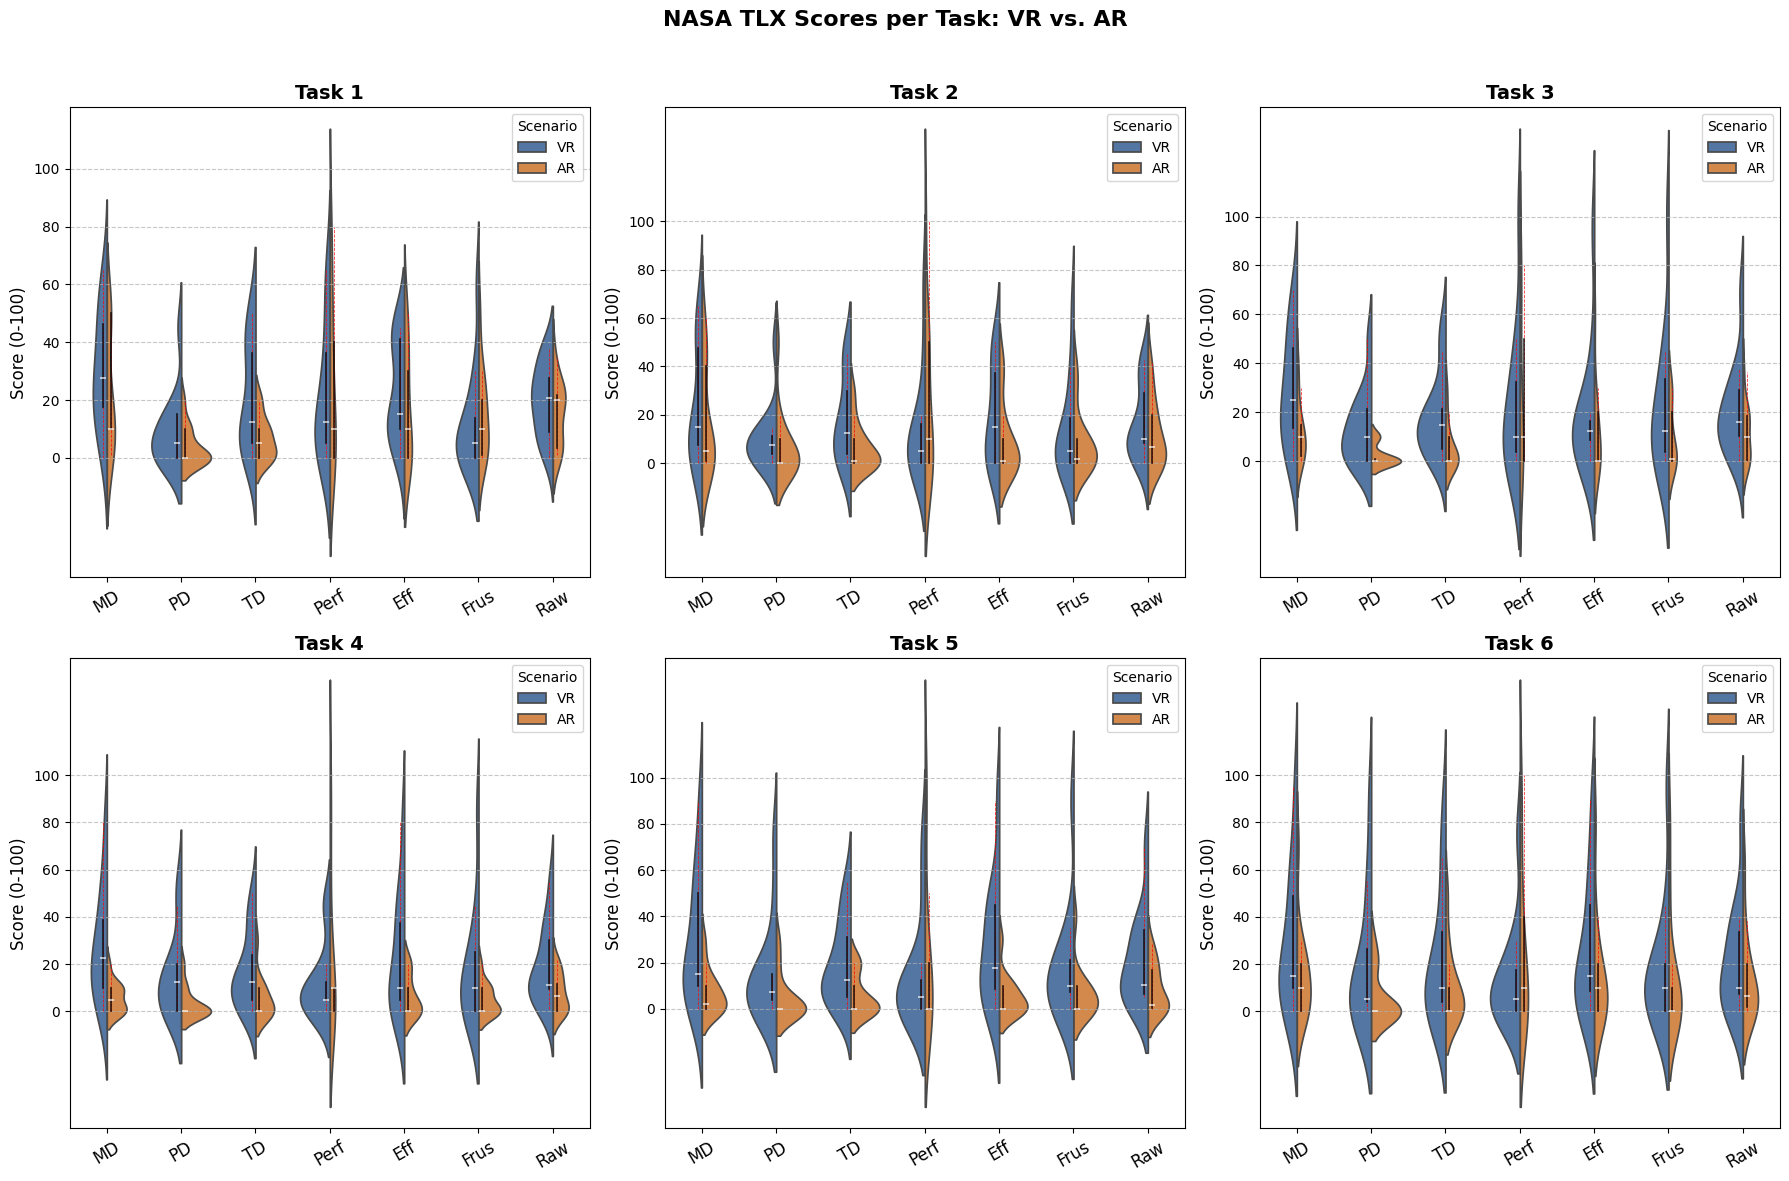

In [ ]:
plot_2Violin(df2, df_melted2)

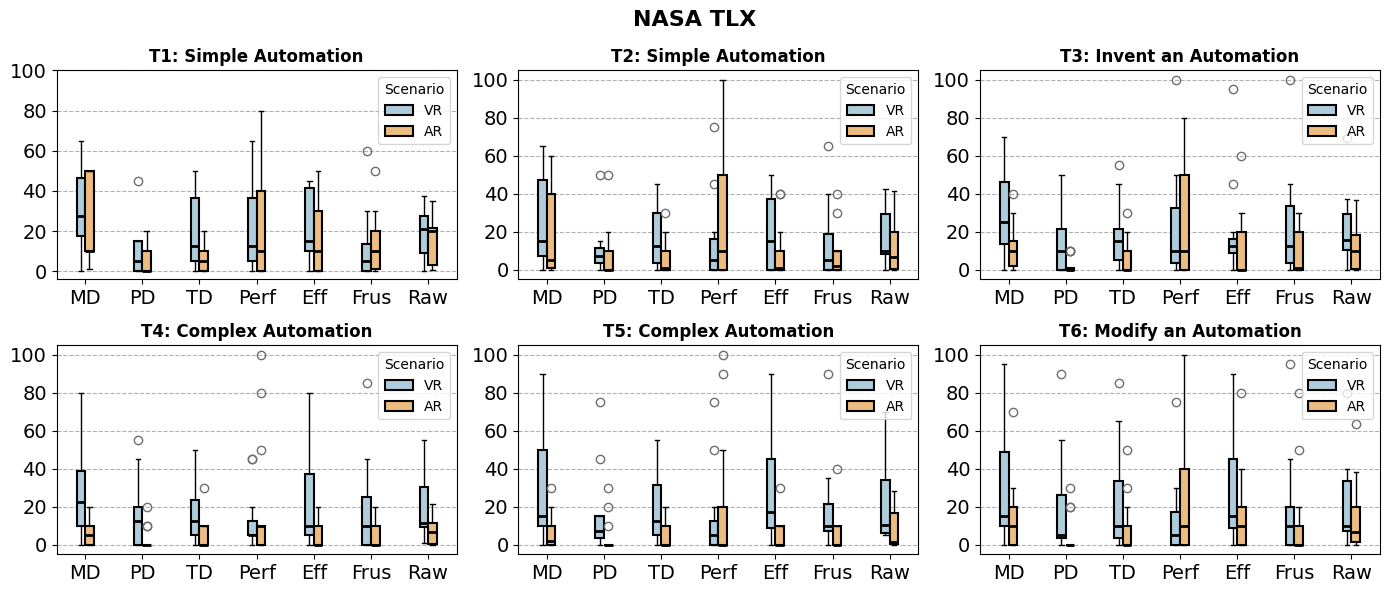

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from collections import defaultdict
import pprint

def plot_2Violin(df, df_melted):
  # Set up the figure for 2 rows × 3 columns
  fig, axes = plt.subplots(2, 3, figsize=(14, 6))
  axes = axes.flatten()

  subplot_titles = ["T1: Simple Automation", "T2: Simple Automation", "T3: Invent an Automation", "T4: Complex Automation", "T5: Complex Automation", "T6: Modify an Automation"]

  # Create violin plots for each task
  tasks = sorted(df["Task"].unique(), key=lambda t: int(t.split()[1]))
  for i, task in enumerate(tasks):
      ax = axes[i]
      bp = sns.boxplot(
          x="Dimension", y="Score", hue="Scenario", data=df_melted[df_melted["Task"] == task],
          ax=ax, width=0.3, palette={"VR": "#a6cee3", "AR": "#febe6f"},
          boxprops=dict(edgecolor="black", linewidth=1.5),
          whiskerprops=dict(color="black", linewidth=1),
          capprops=dict(color="black", linewidth=1),
          medianprops=dict(color="black", linewidth=2)
      )



      # Set title and labels
      ax.set_title(task, fontsize=14, fontweight="bold")
      ax.set_ylabel(None)
      ax.set_yticks([0, 20, 40, 60, 80, 100])
      ax.tick_params(axis='y', which='major', labelsize=14)
      ax.set_xlabel("")
      ax.set_xticks(ticks=range(len(dimensions)), labels=dimensions, rotation=0, fontsize=14)
      ax.set_title(subplot_titles[i], fontsize=12, fontweight="bold")

      # Enhance visibility with a grid
      ax.yaxis.grid(True, linestyle="--")  # Dashed grid lines

      # Fix the legend placement (inside each subplot)
      ax.legend(title="Scenario", loc="upper right")


  # Adjust layout
  plt.suptitle("NASA TLX", fontsize=16, fontweight="bold")
  plt.tight_layout(rect=[0, 0, 1, 1])
  plt.savefig('nasa_tlx_boxplot.pdf', format='pdf', bbox_inches='tight')
  plt.show()

# plot_2Violin(df1, df_melted1) # Assuming df1 and df_melted1 are defined as in the original code
plot_2Violin(df2, df_melted2) # Assuming df2 and df_melted2 are defined as in the original code


# x Carmen

In [ ]:
def calculate_quartiles(data):
    """Calculate Q1, Q2 (median), Q3, and IQR for a given dataset."""
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    return q1, q2, q3, iqr

def print_quartiles(task_scores, scenario):
    """Prints quartiles for each task in a given scenario."""
    print(f"{scenario} scenario")
    for task, data in task_scores.items():
        print(f"    {task}")
        print("        Dimension         | Q1    | Q2    | Q3    | IQR (Q3 - Q1)")
        print("        -------------------------------------------------------------")
        df = pd.DataFrame(data, columns=dimensions)  # Convert to DataFrame for easy computation
        for dim in dimensions:
            q1, q2, q3, iqr = calculate_quartiles(df[dim].dropna())
            print(f"        {dim:<16} | {q1:5.2f} | {q2:5.2f} | {q3:5.2f} | {iqr:8.2f}")

# Define NASA TLX dimensions
dimensions = ["MentalDemand", "PhysicalDemand", "TemporalDemand", "Performance", "Effort", "Frustration", "RawNASA"]

# Print quartile results for VR and AR scenarios
print_quartiles(vr_scores, "VR")
print_quartiles(ar_scores, "AR")

VR scenario
    Task 1
        Dimension         | Q1    | Q2    | Q3    | IQR (Q3 - Q1)
        -------------------------------------------------------------
        MentalDemand     | 17.50 | 27.50 | 46.25 |    28.75
        PhysicalDemand   |  0.00 |  5.00 | 15.00 |    15.00
        TemporalDemand   |  5.00 | 12.50 | 36.25 |    31.25
        Performance      |  5.00 | 12.50 | 36.25 |    31.25
        Effort           | 10.00 | 15.00 | 41.25 |    31.25
        Frustration      |  0.00 |  5.00 | 13.75 |    13.75
        RawNASA          |  8.96 | 20.83 | 27.71 |    18.75
    Task 2
        Dimension         | Q1    | Q2    | Q3    | IQR (Q3 - Q1)
        -------------------------------------------------------------
        MentalDemand     |  7.50 | 15.00 | 47.50 |    40.00
        PhysicalDemand   |  3.75 |  7.50 | 11.25 |     7.50
        TemporalDemand   |  3.75 | 12.50 | 30.00 |    26.25
        Performance      |  0.00 |  5.00 | 16.25 |    16.25
        Effort           |  0.00 |